In [1]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_classification
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

(500, 2)
(500,)


Using Theano backend.


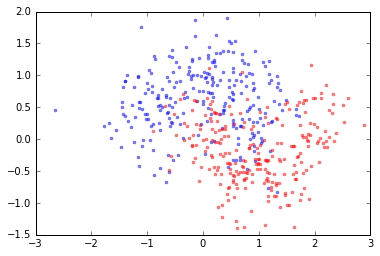

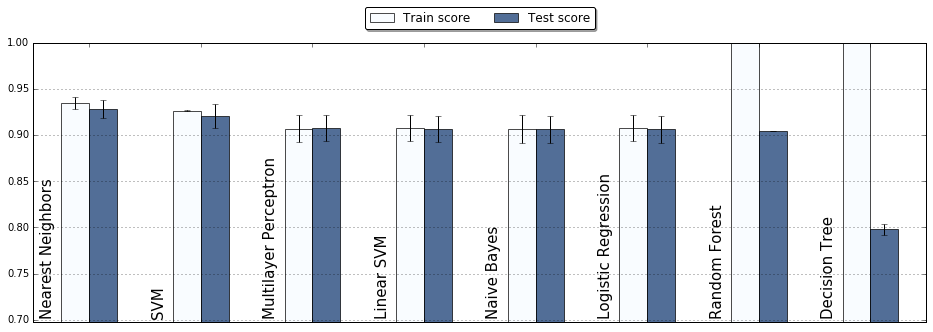

In [2]:
data, label = make_moons(n_samples=500, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.', alpha=.5);
plt.plot(data[label1,0], data[label1,1],'r.', alpha=.5);
scores, confusions, predictions = poly(data,label, n_folds=2, verbose=False, save=False, scale=True,
                                       feature_selection=False, scoring='auc', concurrency=1)
plot(scores)

                                 mean       std       min       max
Multilayer Perceptron train  0.777324  0.033945  0.745638  0.813149
                      test   0.726468  0.057189  0.671280  0.785467
Nearest Neighbors     train  0.779438  0.004967  0.775941  0.785124
                      test   0.607167  0.054528  0.555363  0.664062
SVM                   train  0.950770  0.069662  0.870675  0.997245
                      test   0.723940  0.061121  0.656250  0.775087
Linear SVM            train  0.820372  0.015351  0.803633  0.833792
                      test   0.723715  0.063259  0.667820  0.792388
Decision Tree         train  1.000000  0.000000  1.000000  1.000000
                      test   0.539828  0.016476  0.529412  0.558824
Random Forest         train  0.996642  0.005446  0.990358  1.000000
                      test   0.671438  0.204147  0.437716  0.814879
Logistic Regression   train  0.810489  0.004277  0.807958  0.815427
                      test   0.750392  0.030980 

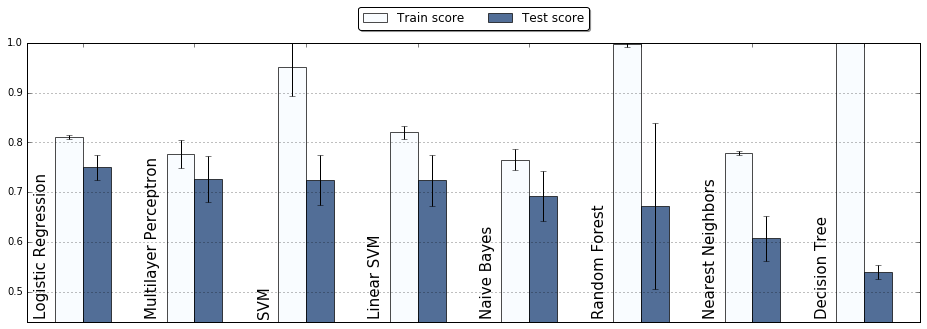

In [3]:
data, label = make_classification(n_samples=100, n_features=20,
                                      n_informative=5, n_redundant=2,
                                      n_repeated=0, n_classes=2,
                                      n_clusters_per_class=2, weights=None,
                                      flip_y=0.01, class_sep=1.0,
                                      hypercube=True, shift=0.0,
                                      scale=1.0, shuffle=True,
                                      random_state=None)
scores, confusions, predictions = poly(data, label, n_folds=3, verbose=True,
                                       feature_selection=True, save=False, concurrency=1)
plot(scores)

In [12]:
for key, val in confusions.items():
    print(key)
    print(val)

Nearest Neighbors
[[ 225.   25.]
 [  45.  205.]]
Naive Bayes
[[ 208.   42.]
 [  40.  210.]]
Decision Tree
[[ 197.   53.]
 [  55.  195.]]
Logistic Regression
[[ 209.   41.]
 [  39.  211.]]
Linear SVM
[[ 209.   41.]
 [  39.  211.]]
Random Forest
[[ 207.   43.]
 [  47.  203.]]
SVM
[[ 214.   36.]
 [  45.  205.]]
Multilayer Perceptron
[[ 190.   60.]
 [  25.  225.]]


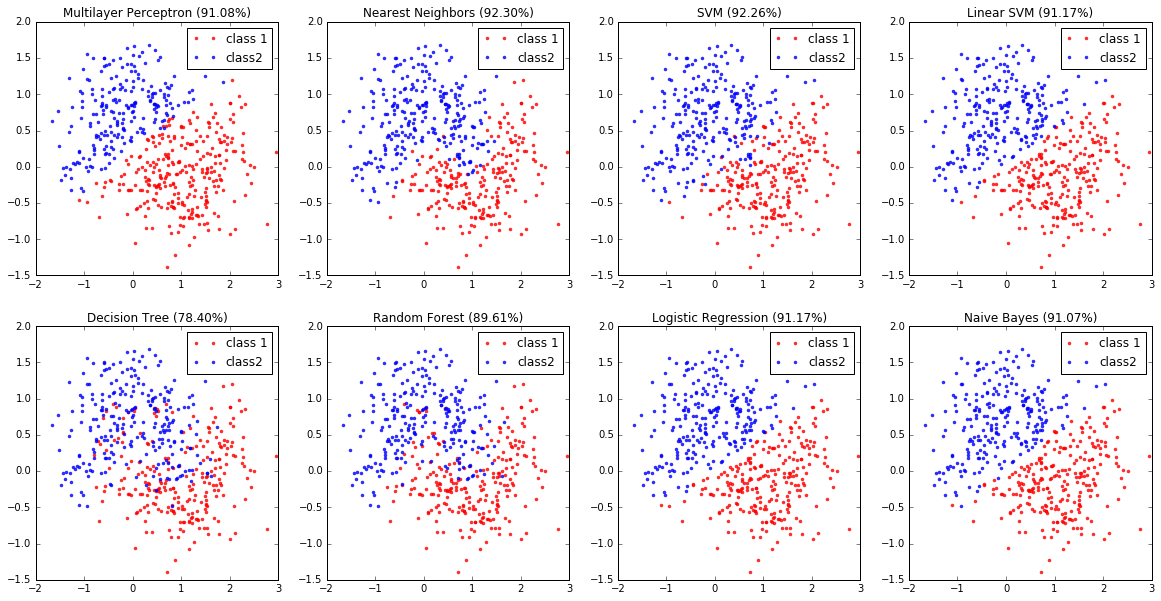

In [13]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(predictions.items()):
    plt.subplot(2,4,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))